# Install libraries

In [31]:
!pip install nltk
!pip install underthesea

In [32]:
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/canhdx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Data

In [33]:
import pandas as pd
data = pd.read_csv('/home/canhdx/workspace/semantic-search/data/dataset.csv')

In [9]:
data.tail(10)

,sentiment,vi_review
5275,negative,tàn át
5276,positive,yêu cháu cơ ❤ ️ ❤ ️ ❤ ️
5277,positive,lắm
5278,negative,"giọng miền tây ấm áp tỉnh cảm ... 😭 , thương"
5279,negative,z
5280,negative,"đau , đau"
5281,positive,💕 🙏 😊
5282,negative,mai mốt j đs 😌
5283,negative,ko hối hận đc . hết mình đc . đc trời sắp xếp r 😳
5284,positive,"cố , lo lắng bố mẹ gđ emcòn trân trọng lỡ"


In [10]:
data.shape

(5285, 2)

# Remove Duplicates

In [11]:
def remove_duplicates(df):
    df.drop_duplicates(subset=['vi_review', 'sentiment'], inplace=True)
remove_duplicates(data)

In [12]:
data.shape

(4975, 2)

# Lowering the Text

In [13]:
data['vi_review']= data['vi_review'].apply(lambda x: x.lower())
data.head()

,sentiment,vi_review
0,negative,buồn 😊
1,negative,minh yn_nhi 2009 🐰 ( nv1 let's go ) c-cũng ước...
2,positive,palm ngủ dậy 😁
3,positive,salim xinh đi thoyyyyy
4,negative,hnay buồn hà 😓


# Remove URL

In [14]:
import re
def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    clean_text = re.sub(url_pattern, '', text)
    return clean_text
data['vi_review'] = data['vi_review'].apply(remove_urls)
data.head()

,sentiment,vi_review
0,negative,buồn 😊
1,negative,minh yn_nhi 2009 🐰 ( nv1 let's go ) c-cũng ước...
2,positive,palm ngủ dậy 😁
3,positive,salim xinh đi thoyyyyy
4,negative,hnay buồn hà 😓


# Remove Punctuation

In [15]:
import string
string.punctuation
def remove_punctuation(text):
    specific_punctuation = "~!@#$%^&*?|{}"
    punctuationfree="".join([i for i in text if i not in specific_punctuation])
    return punctuationfree
data['vi_review']= data['vi_review'].apply(lambda x:remove_punctuation(x))
data.head()

,sentiment,vi_review
0,negative,buồn 😊
1,negative,minh yn_nhi 2009 🐰 ( nv1 let's go ) c-cũng ước...
2,positive,palm ngủ dậy 😁
3,positive,salim xinh đi thoyyyyy
4,negative,hnay buồn hà 😓


# Remove Stopwords

In [ ]:
import underthesea
from underthesea import word_tokenize
with open('vietnamese-stopwords.txt', 'r', encoding='utf-8') as file:
    stopwords = [name.strip().lower() for name in file]
def remove_stopwords_from_text(text):
    words = word_tokenize(text)
    clean_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(clean_words)

data['vi_review'] = data['vi_review'].apply(remove_stopwords_from_text)

# Privacy Reduction

In [50]:
from underthesea import word_tokenize

def replace_names(sentence, names_list):
    words = word_tokenize(sentence)
    replaced_words = ['<someone>' if word.lower() in names_list else word for word in words]
    replaced_sentence = ' '.join(replaced_words)
    return replaced_sentence
with open('names.txt', 'r', encoding='utf-8') as file:
    names_list = [name.strip().lower() for name in file]
data['vi_review'] = data['vi_review'].apply(lambda x: replace_names(x, names_list))
# Example
sentence = 'Bích Loan nghỉ học'
replaced_sentence = replace_names(sentence, names_list)
print(replaced_sentence)


<someone> nghỉ học


In [51]:
data.head(5)

,sentiment,vi_review
0,positive,
1,positive,cam on a .
2,positive,cảm on thumbs-up thumbs-up smiling-face-with-h...
3,positive,ý nghĩa
4,positive,"câu , chữ đời tâm đắc"


In [52]:
import numpy as np
data.replace('', np.nan, inplace=True)
data.dropna(subset=['vi_review'], inplace=True)
data = data.reset_index(drop=True)

In [53]:
data.head(10)

,sentiment,vi_review
0,positive,cam on a .
1,positive,cảm on thumbs-up thumbs-up smiling-face-with-h...
2,positive,ý nghĩa
3,positive,"câu , chữ đời tâm đắc"
4,positive,ah
5,positive,tuyệt vời . câu chuyện tích cực smiling-face-w...
6,positive,ấm áp
7,positive,cám ơn đẹp tuyệt vời
8,positive,tuyệt vời lắm cám ơn nha smiling-face-with-hea...
9,positive,smiling-face-with-hearts smiling-face-with-hea...


In [54]:
data.shape

(5285, 2)

# Save the Dataset

In [25]:
data.to_csv('dataset.csv')

# Visualize Data

In [22]:
df = pd.read_csv('/home/canhdx/workspace/semantic-search/data/dataset.csv')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

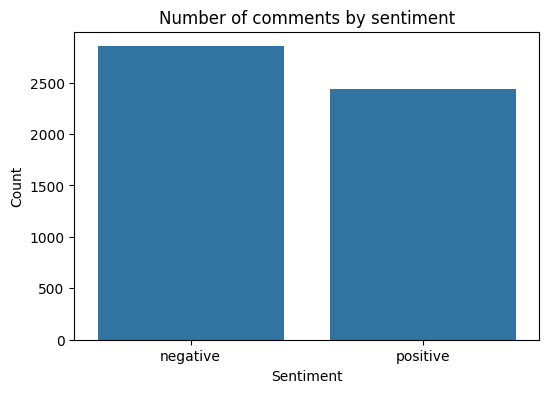

In [26]:
# Bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Number of comments by sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

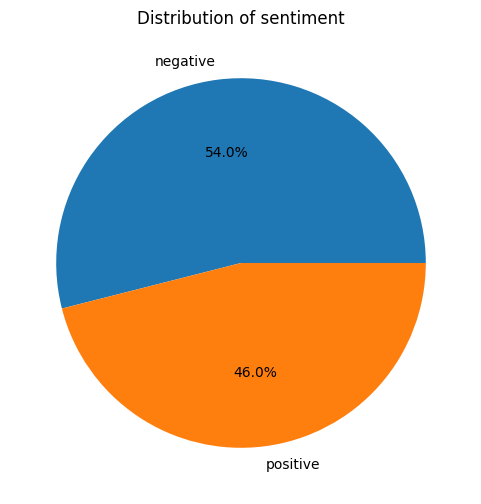

In [27]:
# Pie chart
plt.figure(figsize=(6, 6))
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of sentiment')
plt.ylabel('')
plt.show()

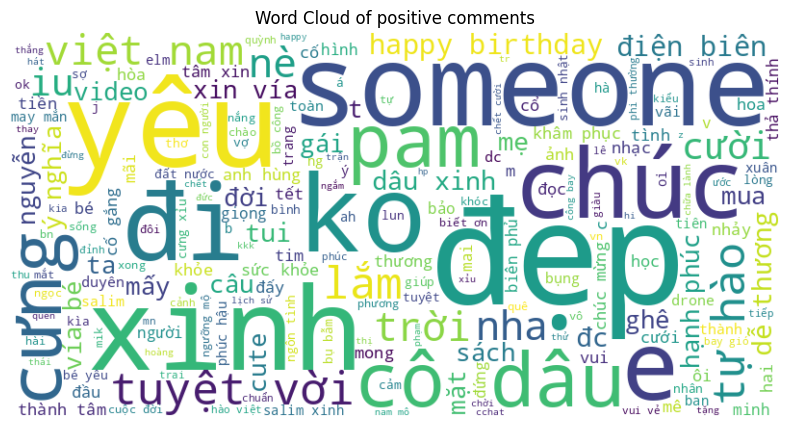

In [29]:
# Word Cloud
from wordcloud import WordCloud

positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['vi_review'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of positive comments')
plt.axis('off')
plt.show()

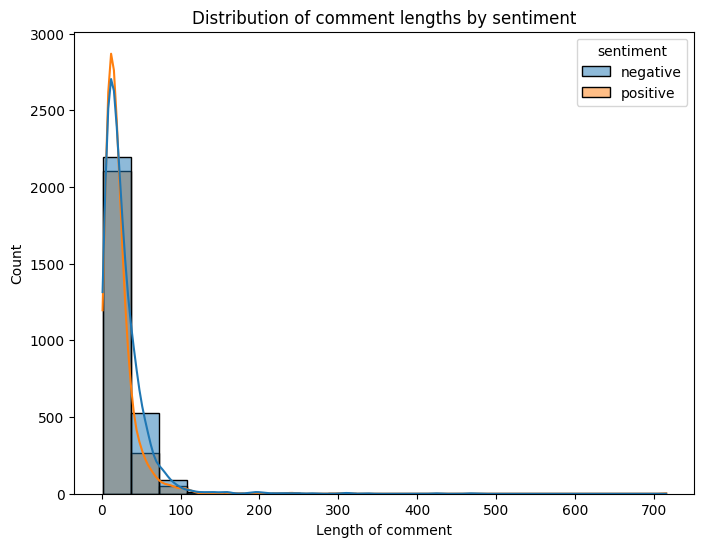

In [30]:
# Histogram of comment lengths
df['length'] = df['vi_review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='length', hue='sentiment', kde=True, bins=20)
plt.title('Distribution of comment lengths by sentiment')
plt.xlabel('Length of comment')
plt.ylabel('Count')
plt.show()